#### Linear regression tensor-flow F° to C° ####
[Источник](https://habr.com/ru/post/453558/)

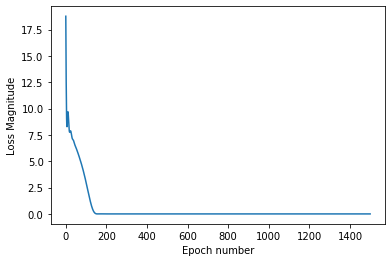

In [74]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt


c = np.array([-40, -10,  0,  8, 15, 22,  38], dtype=float)
f = np.array([-40,  14, 32, 46, 59, 72, 100], dtype=float)


a = [ 1.,2.,4.,5.,7.,8.,9. ]
b = [ _ / 10. + 1. -50 / 7 for _ in a ]
c = np.array([-40, -10,  0,  8, 15, 22,  38], dtype=float)
f = np.array([-40,  14, 32, 46, 59, 72, 100], dtype=float)
c = np.array(a, dtype=float)
f = np.array(b, dtype=float)

ly = tf.keras.layers.Dense(units=10, input_shape=[1])
model = tf.keras.Sequential([ly,
                             tf.keras.layers.Dense(units=80),
                             tf.keras.layers.Dense(units=20),
                             tf.keras.layers.Dense(units=1)])
model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(0.001))  # MSE
hist = model.fit(c, f, epochs=1500, verbose=False)


plt.xlabel('Epoch number')
plt.ylabel('Loss Magnitude')
plt.plot(hist.history['loss'])

- [Линейная регрессия: примеры и вычисление функции потерь](http://ai-news.ru//2018/10/linejnaya_regressiya_primery_i_vychislenie_funkcii_poter.html)
- [Линейная регрессия (пример)](http://www.machinelearning.ru/wiki/index.php?title=%D0%9B%D0%B8%D0%BD%D0%B5%D0%B9%D0%BD%D0%B0%D1%8F_%D1%80%D0%B5%D0%B3%D1%80%D0%B5%D1%81%D1%81%D0%B8%D1%8F_%28%D0%BF%D1%80%D0%B8%D0%BC%D0%B5%D1%80%29)
- [Регрессионный анализ](http://www.machinelearning.ru/wiki/index.php?title=%D0%A0%D0%B5%D0%B3%D1%80%D0%B5%D1%81%D1%81%D0%B8%D0%BE%D0%BD%D0%BD%D1%8B%D0%B9_%D0%B0%D0%BD%D0%B0%D0%BB%D0%B8%D0%B7)
- [Пример решения задачи множественной регрессии с помощью Python](https://habr.com/ru/post/206306/)
- [Введение в машинное обучение с помощью Python и Scikit-Learn](https://habr.com/ru/company/mlclass/blog/247751/)
- [Линейные модели: простая регрессия](https://habr.com/ru/post/279117/)
- [Линейная регрессия](https://proglib.io/p/linear-regression/)
- Криволинейная, сигмоидная, нелинейная, множественная, несколько признаков, логистическая
- Собственная функция

array([5.5])

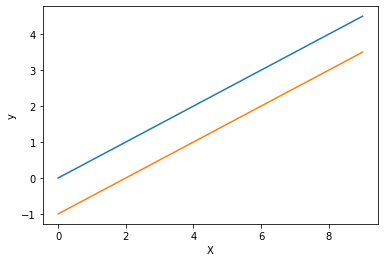

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

'''
f(X) = mX + b
m - нклон
b - сдвиг
'''

lr = LinearRegression()

m = 0.5
X_train = np.array(range(10))
y_train0 = m * X_train + 0.
y_train1 = m * X_train - 1.

lr.fit(X_train.reshape(-1, 1), y_train0)

X_test = np.array([11])
y_test = m * X_test + 0.
y_predict = lr.predict(X_test.reshape(-1, 1))

plt.xlabel('X')
plt.ylabel('y')
plt.plot(X, y_train0)
plt.plot(X, y_train1)

y_predict

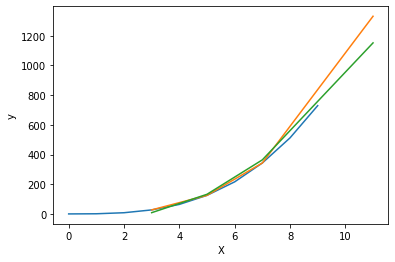

In [45]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures


# https://scikit-learn.org/dev/modules/svm.html#regression
# https://scikit-learn.org/stable/modules/linear_model.html#polynomial-regression-extending-linear-models-with-basis-functions


poly = PolynomialFeatures(degree=2)

X_train = np.array(range(10))
y_train = X_train ** 3

X_test = np.array([3, 5, 7, 11])
y_test = X_test ** 3

_X_train = poly.fit_transform(X_train.reshape(-1, 1))
_X_test = poly.fit_transform(X_test.reshape(-1, 1))

lr = LinearRegression()
lr.fit(_X_train, y_train)
y_predict = lr.predict(_X_test)

plt.xlabel('X')
plt.ylabel('y')
plt.plot(X_train, y_train)
plt.plot(X_test, y_test)
plt.plot(X_test, y_predict)

In [80]:
 99130 / 10. + 1. -50 / 7

9906.857142857143

In [81]:
model.predict([99130])

array([[9906.843]], dtype=float32)

array([ 3.3,  9.3, 15.3, 19.8])

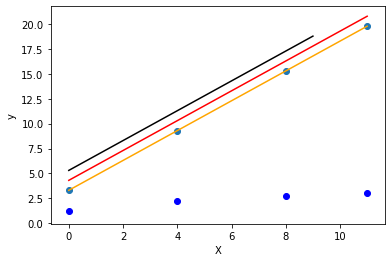

In [245]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

m = 1.5
b = 4.3

X_train = np.array(range(10))
y_train = m * X_train + b

lr.fit(X_train.reshape(-1, 1), y_train)

X_test = np.array([0, 4, 8, 11])
y_test = m * X_test + b
y_predict = lr.predict(X_test.reshape(-1, 1))

y_train += +1.
y_predict += -1.
plt.xlabel('X')
plt.ylabel('y')
plt.plot(X_train, y_train, 'black')
plt.plot(X_test, y_test, 'red')
plt.plot(X_test, y_predict, 'orange')
plt.scatter(X_test, y_predict)
plt.scatter(X_test, np.log(y_predict), color='blue')

y_predict

### Multiple features and train/test spliting

In [151]:
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


X = np.asarray(range(100))
y = X * 1/2
X_train, X_test, y_train, y_test = train_test_split(X.reshape(-1, 4), y.reshape(-1, 4), test_size=0.1, random_state=0)

lr = LinearRegression()
lr.fit(X_train, y_train)

y_predict = lr.predict(X_test)

print(mean_squared_error(y_test, y_predict))
print(r2_score(y_test, y_predict))

2.2351058981262e-29
1.0


In [115]:
X_test

array([[20, 21, 22, 23],
       [ 8,  9, 10, 11],
       [76, 77, 78, 79]])

In [124]:
y_test

array([[10. , 10.5, 11. , 11.5],
       [ 4. ,  4.5,  5. ,  5.5],
       [38. , 38.5, 39. , 39.5]])

In [125]:
y_predict

array([[10. , 10.5, 11. , 11.5],
       [ 4. ,  4.5,  5. ,  5.5],
       [38. , 38.5, 39. , 39.5]])

### Log

4.411855148145515e-22
1.0


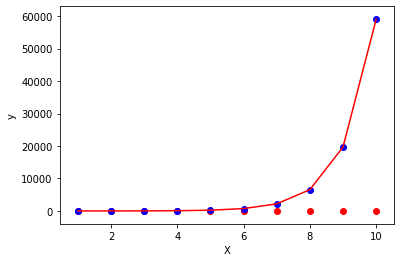

In [400]:
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


X = np.asarray(range(1, 10+1))
y = np.e ** X
y = 3 ** X  # ** 2
X_train, X_test, y_train, y_test = train_test_split(X.reshape(-1, 1), y.reshape(-1, 1), test_size=0.3, random_state=0)

lr = LinearRegression()
lr.fit(X_train, np.log(y_train))

y_predict = np.exp(lr.predict(X_test))

print(mean_squared_error(y_test, y_predict))
print(r2_score(y_test, y_predict))

plt.xlabel('X')
plt.ylabel('y')
plt.plot(X, y, color='red')
plt.scatter(X, np.log(y), color='red')
plt.scatter(X, np.exp(np.log(y)), color='blue')

In [401]:
y_test

array([[   27],
       [19683],
       [  243]])

In [402]:
y_predict

array([[   27.],
       [19683.],
       [  243.]])

In [408]:
o = np.asarray([16, 10, 1])
l = np.log(o)
np.e ** l  # 2.718281
np.exp(np.log([10, 9, 1])), np.e ** np.log([10, 9, 1])

(array([10.,  9.,  1.]), array([10.,  9.,  1.]))

array([[ 1.,  1.,  1.],
       [ 1.,  2.,  4.],
       [ 1.,  5., 25.],
       [ 1.,  4., 16.],
       [ 1.,  5., 25.],
       [ 1.,  8., 64.],
       [ 1.,  7., 49.],
       [ 1.,  8., 64.],
       [ 1.,  9., 81.],
       [ 1.,  3.,  9.]])

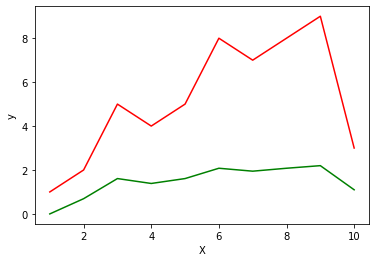

In [426]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)

X = np.asarray(range(1, 10+1))
y = X**2
y = np.asarray([ 1, 2, 5, 4, 5, 8, 7, 8, 9, 3 ])

plt.xlabel('X')
plt.ylabel('y')
plt.plot(X, y, color='red')
plt.plot(X, np.log(y), color='green')

poly.fit_transform(y.reshape(-1, 1))

array([1.25, 1.69])

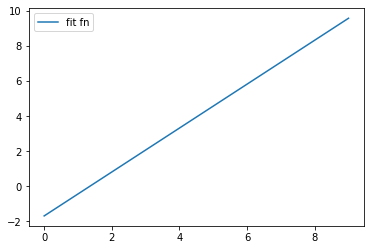

In [474]:
# http://acm.mipt.ru/twiki/bin/view/Cintro/ExtrapolPython
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html

# Kernel ridge regression (KRR), Nearest Neighbors Regression, Gaussian Process Regression etc.to fit nonlinear data
#   https://scikit-learn.org/stable/supervised_learning.html

from scipy.optimize import curve_fit

def func(x, a, b, c, d):
    return a * np.exp(-b * (x - c)) + d
def func(x, a, b, c):
    return a + b * np.exp(-c * x**2)
def func(x, a, b):
    return x * a - b

X = np.asarray(range(10))
beta = (0.25, 0.75, 0.5)
beta = (0.5, 1.)
y = func(X, *beta)
y = y**2 + 0.31 # add noise

popt, _ = curve_fit(func, X, y)
plt.plot(X, func(X, *popt), label='fit fn')
plt.legend()
popt

- Предсказывать сумму по какой пройдет следующий обьем
- тренировать веса регрессии по обьему

In [12]:
import pandas as pd

fn = 'GAZP_190726_190726.txt'
fn = 'GAZP_190501_190726.txt'
fn = 'TATNP_190501_190729.csv'
df = pd.read_csv(fn)[['O', 'C', 'H', 'L', 'V']]
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6380 entries, 0 to 6379
Data columns (total 5 columns):
O    6380 non-null float64
C    6380 non-null float64
H    6380 non-null float64
L    6380 non-null float64
V    6380 non-null int64
dtypes: float64(4), int64(1)
memory usage: 249.3 KB


(6380, 5)

0.3460501027929577
0.9995653358373497


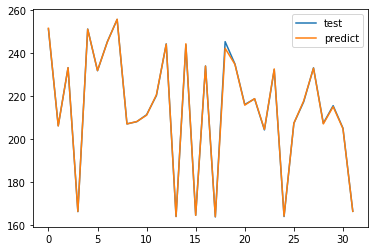

In [550]:
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


X = df['O']
# X = df[['O', 'V']]
y = df['C']

# scaler = StandardScaler()
# X = scaler.fit_transform(X)
# Y = scaler.fit_transform(Y)

X_train, X_test, y_train, y_test = train_test_split(X.values.reshape(-1,1), y, test_size=0.005)

lr = LinearRegression()
lr.fit(X_train, y_train)

y_predict = lr.predict(X_test)

print(mean_squared_error(y_test, y_predict))
print(r2_score(y_test, y_predict))

y_test.values, y_predict

plt.plot(y_test.values, label='test')
plt.plot(y_predict, label='predict')
plt.legend()

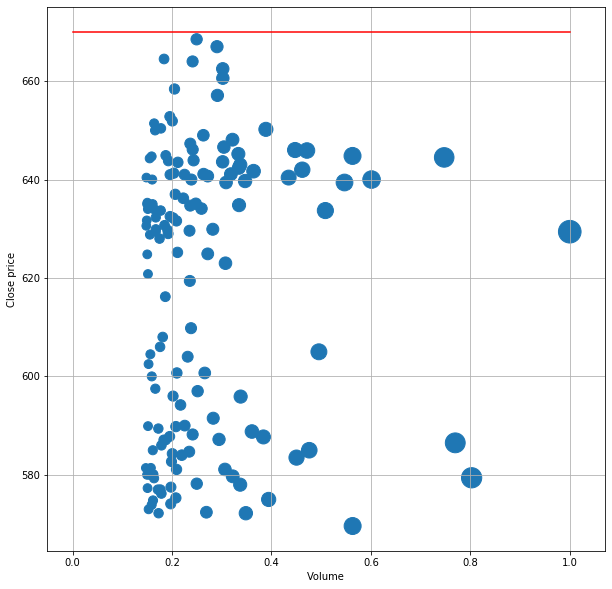

In [15]:
import matplotlib.pyplot as plt


p = 670.
g = df[['V', 'C']].groupby('C').apply(lambda _ : _).sort_values(by=['V'], ascending=False)[:150]
g = g[ g['C'] >= 206. ]
plt.figure(figsize=(10,10))
plt.xlabel('Volume')
plt.ylabel('Close price')
X,Y = g['V'] / g['V'].max(), g['C']
plt.scatter(X, Y, s=X*512)
plt.plot([p,p], color='red')
plt.grid(True)

In [10]:
g

,V,C
1889,4642590,702.8
3674,1427610,776.8
524,602020,723.2
2204,504380,748.5
1049,432450,675.9
3254,382120,759.7
1888,356860,695.0
839,306300,706.4
4514,298350,780.0
1050,291050,667.2
